In [1]:
import csv, sqlite3, matplotlib
import pandas as pd
from pandas import DataFrame, Series
from collections import defaultdict

In [2]:
data1 = pd.read_csv('co-est2019-alldata.csv')
data2 = pd.read_csv('COVID-19_Historical_Data_Table.csv')

In [3]:
dict1 = defaultdict(int)

dict2 = {}
dict3 = {}
FIPS = None
for i in range(len(data1)):
    if data1["STNAME"][i] == "Wisconsin":
        FIPS = (2-len(str(data1["STATE"][i])))* "0" + str(data1["STATE"][i]) + (3-len(str(data1["COUNTY"][i])))* "0" + str(data1["COUNTY"][i])
        
        dict2[data1["CTYNAME"][i]] = FIPS
        dict3[data1["CTYNAME"][i]] = data1["POPESTIMATE2019"][i]
        

dict4 = {}
county = None
list1 = []
for i in range(len(data2)):
    if data2["NEGATIVE"][i] == "NaN":
        data2["NEGATIVE"][i] = 0
    if data2["POSITIVE"][i] == "NaN":
        data2["POSITIVE"][i] = 0
    if data2["GEO"][i] == "County":
        county = data2["NAME"][i] + " " + data2["GEO"][i]
    if data2["GEO"][i] == "State":
        county = "Wisconsin"
    fraction_positive = data2["POSITIVE"][i]/(data2["NEGATIVE"][i] + data2["POSITIVE"][i])
    
    dict4 = {"Date": data2["LoadDttm"][i][:10], "FIPS": dict2[county] , "county": county, "population": dict3[county], "fraction of positive tests": fraction_positive}
    list1.append(dict4)
    
df = DataFrame(list1)

a = df.pivot(index = "county", columns = "Date", values = "fraction of positive tests")

list1 = []
for i in range(len(df)):
    list2 = []
    list2.append(df["FIPS"][i])
    list2.append(df["county"][i])
    list2.append(df["population"][i])
    list1.append(list2)
    
b = DataFrame(list1)
b = b[:73]
b["FIPS"] = b[0]
b.pop(0)
b["county"] = b[1]
b = b.set_index(1)
b["population"] = b[2]
b.pop(2)

result = pd.concat([b, a], axis = 1, sort = False)
r = result.reset_index()
r.pop("index")
r = r.sort_values("population", ascending = True)
r.head()
r = r.reset_index()
r.pop("index")
r.head()

,FIPS,county,population,2020/03/15,2020/03/16,2020/03/17,2020/03/18,2020/03/19,2020/03/20,2020/03/21,...,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08,2020/05/09,2020/05/10,2020/05/11,2020/05/12
0,55037,Florence County,4295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.076923,0.074074,0.071429,0.064516,0.064516,0.064516,0.062500,0.058824,0.057143,0.055556
1,55078,Menominee County,4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013158,0.012821,0.012500,0.011494,0.021739,0.019231,0.017699,0.017391,0.017391,0.016000
2,55051,Iron County,5687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.045455,0.045455,0.042553,0.040816,0.040000,0.037736,0.036364,0.033333,0.032258,0.032258
3,55091,Pepin County,7287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,55041,Forest County,9004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.010526,0.009709,0.009346,0.009091,0.018072,0.020619,0.019704


In [4]:
%matplotlib inline
matplotlib.rcParams["font.size"] = 12

Text(0, 0.5, 'fraction of positive tests')

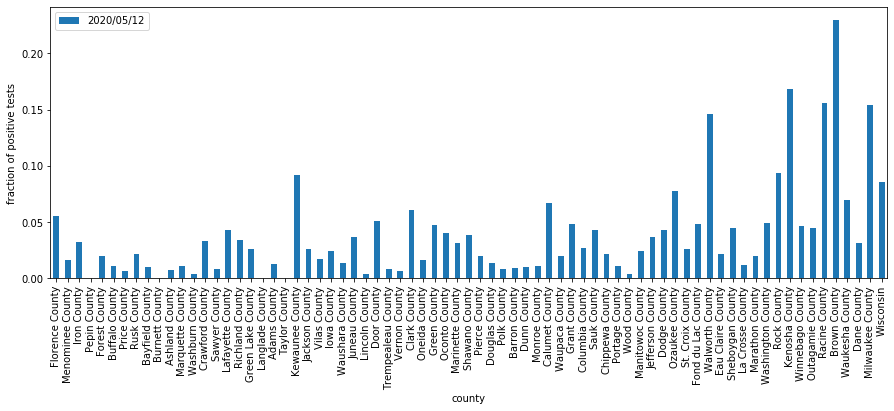

In [5]:
# fraction of positive tests for all counties on 2020/05/12
# graph is sorted by population in ascending order

a = r[["county","2020/05/12"]].plot(x="county", kind="bar",figsize=(15,5))
a.set_ylabel("fraction of positive tests")

Text(0.5, 1.0, 'Wisconsin')

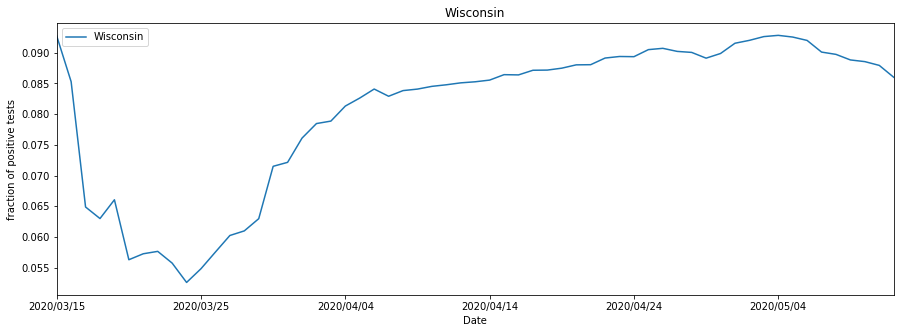

In [6]:
# fraction of positive tests on all dates for a specific county (in this case Wisconsin total)

a = result.loc[r.loc[72][1]][3:].plot(figsize = (15,5), legend = True)   #plotting only Wisconsin data
a.set_xlabel("Date")
a.set_ylabel("fraction of positive tests")
a.set_title("Wisconsin")

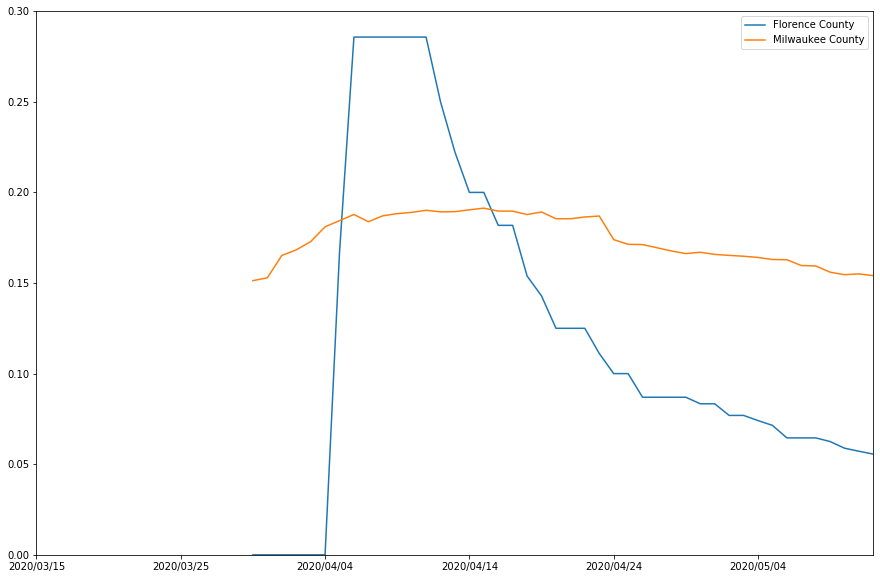

In [7]:
# comparing fraction positive for the least population and most population counties

result.loc[r.loc[0][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)
result.loc[r.loc[71][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

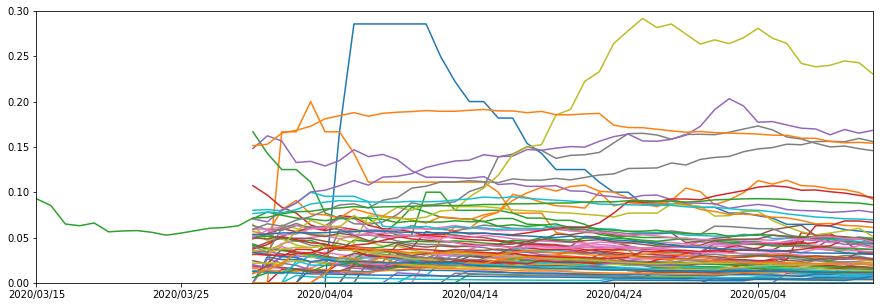

In [8]:
# fraction of postive cases for all counties

for i in range(len(r)):
    r.loc[i][3:].plot(figsize = (15,5), ylim = 0)

In [9]:
# Next Few graphs are the fraction of positive cases, where the counties are divided into four 
# groups--quartiles of the population distribution and plot, with all four plots having the 
# same y-axis scale.

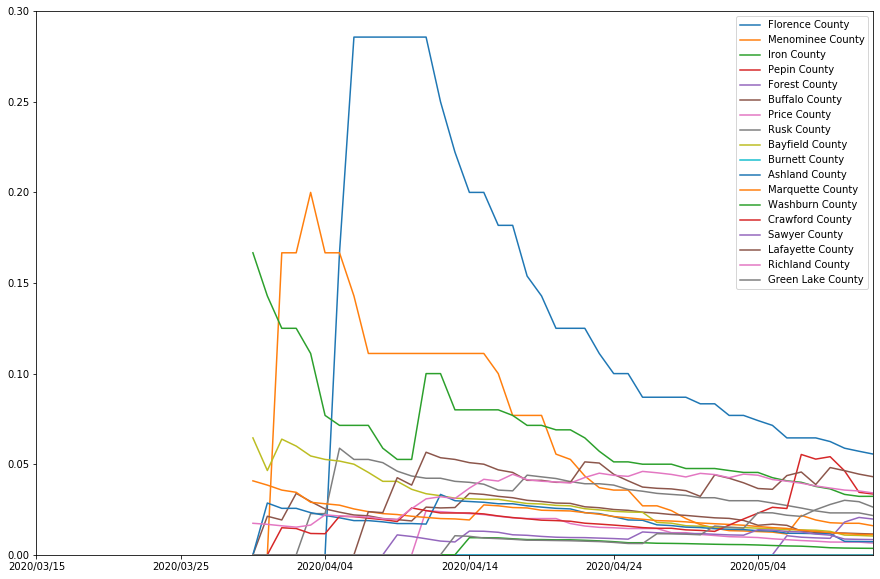

In [10]:
# 1st quartile of population

for i in range(0, int(len(r)/4)):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15, 10), ylim = (0,0.30), legend = True) 

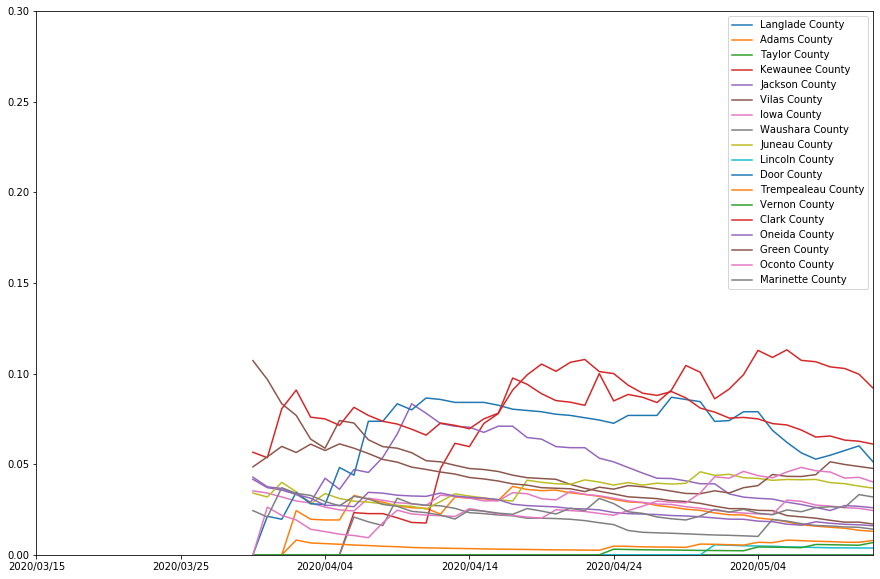

In [11]:
# 2nd quartile of population

for i in range(int(len(r)/4), int(len(r)/2)):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

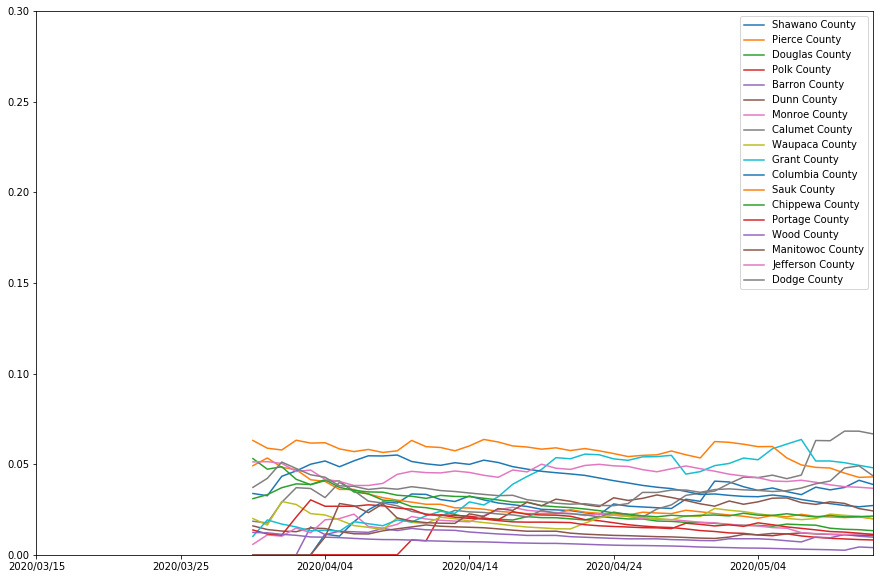

In [12]:
# 3rd quartile of population

for i in range(int(len(r)/2),int(3*len(r)/4)):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

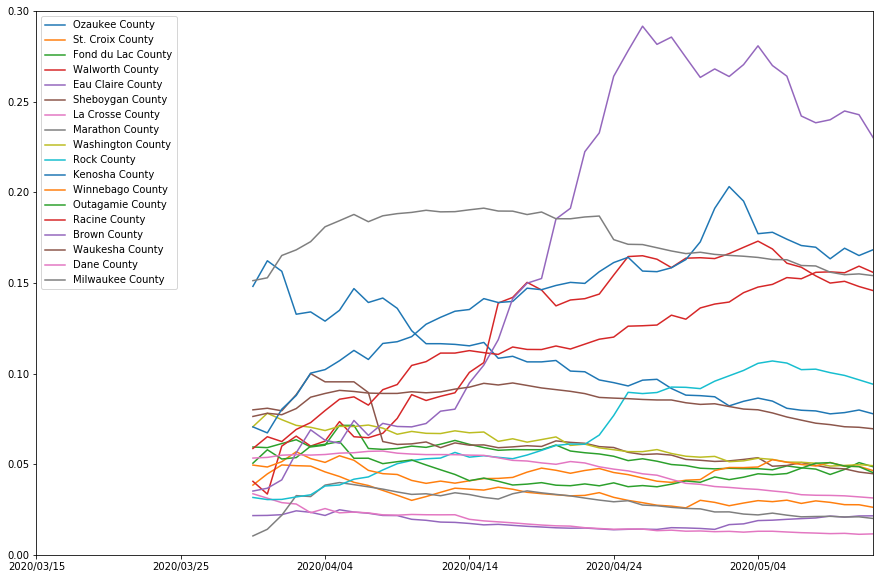

In [13]:
# 4th quartile of population

for i in range(int(3*len(r)/4),int(len(r))-1):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

In [14]:
dict1 = defaultdict(int)
dict2 = defaultdict(int)
dict3 = defaultdict(int)
dict4 = defaultdict(int)
dict5 = defaultdict(int)
dict6 = defaultdict(int)

r1 = r.drop(72)

for i in r1:
    if i != "FIPS" and i != "county" and i != "population":
        for j in range(int(len(r1)/2)):
            dict1[i] += r1[i][j]
            dict2[i] += 1
        for j in range(int(len(r1)/2), int(len(r1))):
            dict4[i] += r1[i][j]
            dict5[i] += 1
for i in dict1:
    dict3[i] = dict1[i]/dict2[i]
for i in dict4:
    dict6[i] = dict4[i]/dict5[i]   
    
list1 = [dict(dict3), dict(dict6)]
agg = DataFrame(list1)

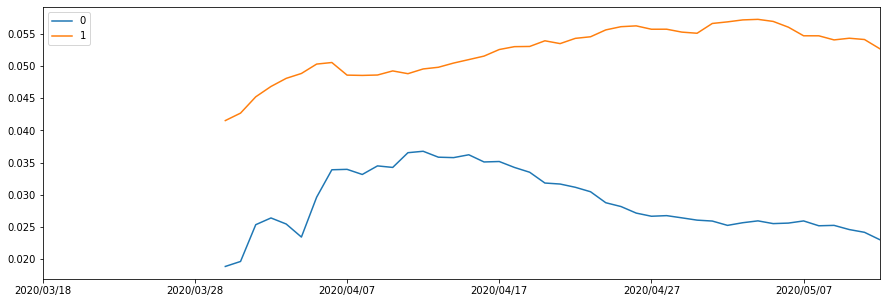

In [15]:
# plot for aggregate of high and low population counties

agg.loc[0][3:].plot(figsize = (15,5), legend = True)    # orange denotes aggregate of high population counties
agg.loc[1][3:].plot(figsize = (15,5),legend = True)    # blue denotes aggregate of low population counties